## Project Description: Next Word Prediction Using LSTM
#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (LSTM) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: We use the text of Shakespeare's "Hamlet" as our dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

In [1]:
# Data Collection

import nltk 
nltk.download('gutenberg') # this is the lib that contains a text file 
from nltk.corpus import gutenberg
import pandas as pd


#load the dataset

data=gutenberg.raw('shakespeare-hamlet.txt')

#save to file
with open('hamlet.txt','w') as f:
    f.write(data)


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\sukri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


In [2]:
## Data preprocessing 

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# loading the dataset
with open ('hamlet.txt','r') as f:
    text=f.read().lower()

#tokenize the text - creating indicies for words
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text]) #breaks text into words,counts frequency and assigns numbers
total_words=len(tokenizer.word_index)+1 #index 0 is reserved for padding thus +1
total_words


4818

In [3]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [4]:
# creating input sequences
#so 
input_sequences=[]
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range (1,len(token_list)):
        n_gram_sequnece=token_list[:i+1]
        input_sequences.append(n_gram_sequnece)

In [5]:
input_sequences
# created every sentence into sequnece of sentences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [6]:
#pad sequence 
max_sequence_length=max([len(x) for x in input_sequences])
max_sequence_length # 14 is the max length wrt all the sentences 


14

Padding Sequence this mean making the sentences of same length
for ex: "to the madam":[4,5,6]
and "he is a teacher":[5,9,96,3]

so this creates a conflit of dimensions 

In [7]:
## applied the padding sequence
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_length,padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]],
      shape=(25732, 14), dtype=int32)

In [8]:
# creating predictors and label 

import tensorflow as tf 
x,y=input_sequences[:,:-1],input_sequences[:,-1]
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]],
      shape=(25732, 13), dtype=int32)

In [9]:
y

array([ 687,    4,   45, ..., 1047,    4,  193],
      shape=(25732,), dtype=int32)

In [10]:
y=tf.keras.utils.to_categorical(y,num_classes=total_words)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(25732, 4818))

In [11]:
# Split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
# Define early stopping optimized for higher accuracy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy instead of loss
    patience=25,  # More patience for better learning
    restore_best_weights=True,
    verbose=1,
    mode='max'  # We want to maximize accuracy
)

# Add learning rate reduction for fine-tuning
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

In [13]:
# Train LSTM RNN - Enhanced architecture for 50%+ accuracy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout

# Enhanced model architecture for better performance
model=Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_length-1))  # Increased from 50
model.add(LSTM(128, return_sequences=True))  # First LSTM layer
model.add(Dropout(0.3))
model.add(LSTM(64))  # Second LSTM layer for better learning
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dropout(0.2))
model.add(Dense(total_words,activation="softmax"))

# Build the model to initialize weights
model.build(input_shape=(None, max_sequence_length-1))

# Compile the model with better optimizer
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

model.summary()

d:\Genai-lc-hf\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 13, 128)        │       616,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 13, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4818)           │       313,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115,026 (4.25 MB)

 Trainable params: 1,115,026 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history=model.fit(
    x_train, y_train,
    epochs=200,  # More epochs for better learning
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stopping, reduce_lr],  # Both callbacks
    batch_size=16  # Smaller batch size for better gradients
)

Epoch 1/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.0333 - loss: 6.8092 - val_accuracy: 0.0352 - val_loss: 6.6111 - learning_rate: 0.0010
Epoch 2/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.0376 - loss: 6.4912 - val_accuracy: 0.0414 - val_loss: 6.7069 - learning_rate: 0.0010
Epoch 3/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.0433 - loss: 6.3564 - val_accuracy: 0.0462 - val_loss: 6.7761 - learning_rate: 0.0010
Epoch 4/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.0491 - loss: 6.2338 - val_accuracy: 0.0538 - val_loss: 6.8650 - learning_rate: 0.0010
Epoch 5/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.0539 - loss: 6.1097 - val_accuracy: 0.0579 - val_loss: 6.9094 - learning_rate: 0.0010
Epoch 6/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.0611 - loss: 6.0038 - val_accuracy: 0.0631 - val_loss: 7.0018 - learning_rate: 0.0010
Epoch 7/200
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step -

In [15]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [16]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_length=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_length)
print(f"Next Word Prediction:{next_word}")

Input text:To be or not to be
Next Word Prediction:the


In [17]:
model.save("word_prediction_lstm.h5")
import pickle

with open('tokenizer.pickle','wb') as f:
    pickle.dump(tokenizer,f,protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
input_text="Friends to  "
print(f"Input text:{input_text}")
max_sequence_length=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_length)
print(f"Next Word Prediction:{next_word}")

Input text:Friends to  
Next Word Prediction:the


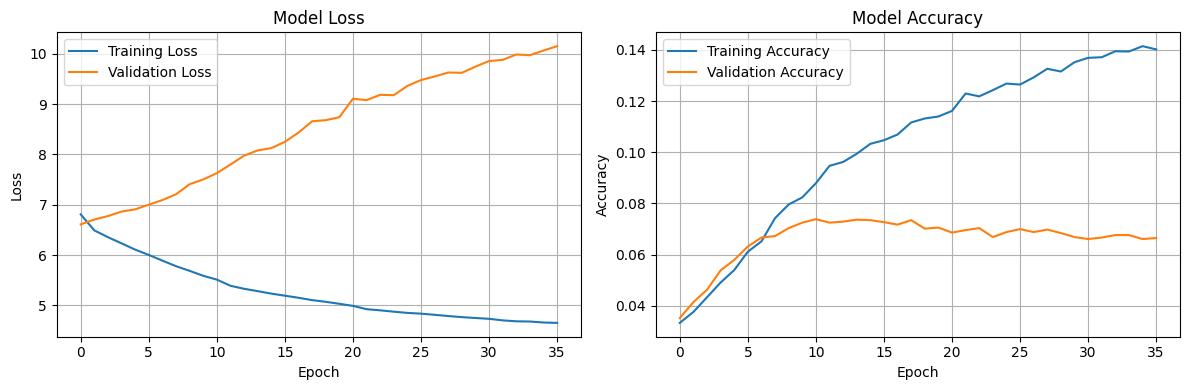

Final Training Accuracy: 0.1402
Final Validation Accuracy: 0.0664
Number of epochs trained: 36


In [19]:
# Check training history to diagnose the issue
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Number of epochs trained: {len(history.history['loss'])}")

### The accuracy of the model is not increasing because the data set is too small to train with LSTM